In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Linear_regression(petrol_consumption).csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
#checking for missing values
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [6]:
#Univariate Analysis
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


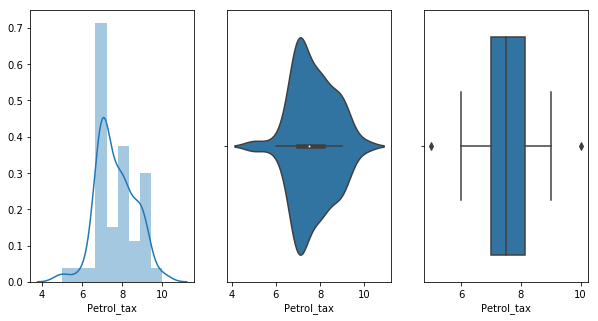

In [7]:
#visualization
plt.subplots(figsize = [10, 5])
plt.subplot(131)
sns.distplot(df['Petrol_tax'])
plt.subplot(132)
sns.violinplot(df['Petrol_tax'])
plt.subplot(133)
sns.boxplot(df['Petrol_tax'])
plt.show()

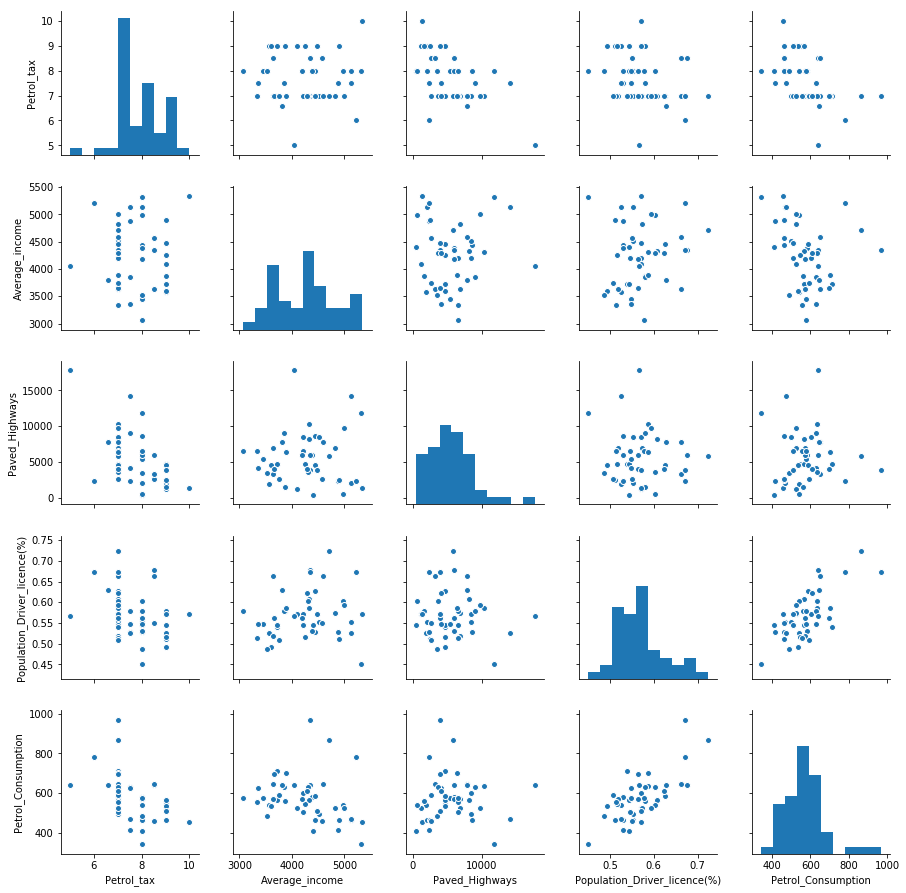

In [8]:
sns.pairplot(df)

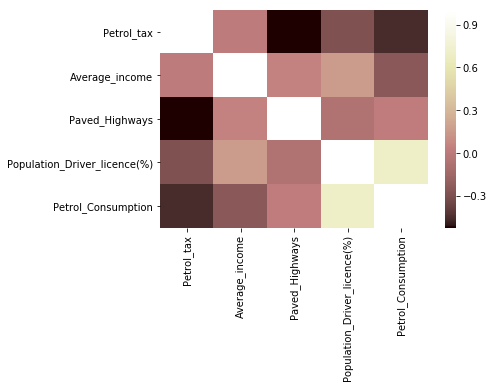

In [12]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap = "pink")
plt.show()

In [13]:
#preparing dataset
from sklearn.model_selection import train_test_split as tts
train, test = tts(df, train_size = 0.8, test_size = 0.2)

In [18]:
train_x = train.loc[:, train.columns != 'Petrol_Consumption']
test_x = test.loc[:, test.columns != 'Petrol_Consumption']
train_y = train['Petrol_Consumption']
test_y = test['Petrol_Consumption']

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
test_pred = model.predict(test_x)

In [21]:
result = pd.DataFrame({'Actual': test_y, 'Predicted': test_pred})
print(result)

    Actual   Predicted
16     603  600.421138
26     577  593.380114
7      467  486.476503
4      410  528.066323
19     640  718.217709
38     648  752.356491
23     547  457.107304
43     591  543.447332
22     464  405.771981
20     649  718.721087


In [22]:
#computing mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(test_y, test_pred))
print(mean_absolute_error(test_y, test_pred))

5019.572196027187
60.447047229684884


In [24]:
#computing r2 score
from sklearn.metrics import r2_score
print(r2_score(test_y, test_pred)*100)

23.59441010424945
